In [1]:
# Comparisons, Masks, and Boolean logic
# use boolean mask to examine and manipulate values with numpy arrays
# masking is used to extract, modify, count, or manipulate values in array on some criteria

# Example: counting rainydays
# using a dataset that represents the amount of precipitation on each day in a given year in a 
# given city

In [2]:
import numpy as np
import pandas as pd

In [3]:
# use pandas to extract rainfall inches as a numpy array
rainfall = pd.read_csv('dataScience/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

FileNotFoundError: [Errno 2] No such file or directory: 'dataScience/Seattle2014.csv'

In [4]:
# use pandas to extract rainfall inches as a numpy array
rainfall = pd.read_csv('/home/pryme/Documents/Projects/dataScience/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

(365,)

In [5]:
matplotlib_fname
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

NameError: name 'matplotlib_fname' is not defined

In [6]:
matplotlib_inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

NameError: name 'matplotlib_inline' is not defined

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

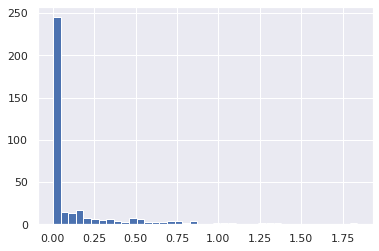

In [8]:
plt.hist(inches, 40);

In [9]:
# This gives a general idea of what the data looks like: 
# We can use numpy ufuncs in place of loops to do fast element-wise arithmetic operation on arrays
# then manipulate the results to show the answers we have

In [10]:
x = np.array([1,2,3,4,5])

In [11]:
x < 3 

array([ True,  True, False, False, False])

In [12]:
x > 3 

array([False, False, False,  True,  True])

In [13]:
# numpy implements comparison operators as element wise ufuncs 
# also possible to do an element by element comparison of two arrays

In [14]:
(x * 2) == (x ** 2)

array([False,  True, False, False, False])

In [15]:
# Two dimensional example: 
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3,4))

In [16]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [17]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [18]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [19]:
# counting entries
# to count the number of True entries np.count_nonzero is useful
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [20]:
# We can get this with np.sum, false is interpreted as 0, ad True is interpreted as 1:
np.sum(x < 6)

8

In [21]:
# Benefit of sum() is like with other numpy aggregation functions, the sum can be done along rows or columns as well: 

# how many values are less than six in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [22]:
# to check if any/all values are true use np.any() or np.all()
# are there any values greater than 8? 
np.any(x > 8)

True

In [23]:
# are all values greater than 8? 
np.all(x > 8)

False

In [24]:
# can be used along particular axes as well
np.all(x < 8, axis=1)

array([ True, False,  True])

In [25]:
# Elements in the first and third rows are less than 8, but not the second

# To find how many days have rainfall between 0.5 and 1.0 inches we would do:
np.sum((inches > 0.5) & (inches < 1))

29

In [26]:
# Can also be written 
np.sum(~( (inches <= 0.5) | (inches >= 1)))

29

In [29]:
# using these tools we can start answering questions about our data set
print("Number of days without rain:     ", np.sum(inches == 0))
print("Number of days with rain:        ", np.sum(inches != 0))
print("Days with more than 0.5 inches:  ", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches:    ", np.sum((inches > 0) & (inches < 0.2))) 

Number of days without rain:      215
Number of days with rain:         150
Days with more than 0.5 inches:   37
Rainy days with < 0.1 inches:     75


In [30]:
# boolean arrays as masks 
# a more powerful patter is to use boolean arrays as masks
# if we want an array of all values in the array less and 5: 
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [31]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [32]:
# to select these values we can index the boolean array
x[x < 5] # this is a masking operation

array([0, 3, 3, 3, 2, 4])

In [33]:
# it returned a one dimensional array filled with the values that meet this condition
# we can compute statistics on the seattle rain data using this: 

# to construct a mask of all rain days 
rainy = (inches > 0)

In [34]:
# Construct a mask of all summer days (june 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

In [35]:
print("Median precip on rainy days in 2014 (inches):    ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):   ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches):  ", np.max(inches[summer]))
print("Median precip on non-summer days (inches):       ", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):     0.19488188976377951
Median precip on summer days in 2014 (inches):    0.0
Maximum precip on summer days in 2014 (inches):   0.8503937007874016
Median precip on non-summer days (inches):        0.20078740157480315
